In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
from sklearn.manifold import TSNE
import time
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [2]:
descriptors = np.load("db_descriptors.npy")
desc = []
targets = []
for descriptor in descriptors:
    desc.append(descriptor[0])
    targets.append(descriptor[1])
    


desc = np.asarray(desc)
targets = np.asarray(targets)

In [7]:
# Function to create a scatter-plot

def draw_scatter(x, y):
    # choose a color palette with seaborn.
    
    num_classes = len(np.unique(y))
    palette = np.array(sns.color_palette("hls", num_classes))
    classes = np.array(['ape', 'benchvise', 'cat', 'cam', 'duck'])
    
    # create a scatter plot.
    
    f = plt.figure(figsize=(12, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40)
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    ax.axis('off')
    ax.axis('tight')
    #plt.axes().get_xaxis().set_visible(False)
    #plt.axes().get_yaxis().set_visible(False)

    
    # add the labels for each digit corresponding to the label
    txts = []

    for i, className in enumerate(classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[y == className, :], axis=0)
        txt = ax.text(xtext, ytext, className, fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    
    plt.savefig('embeddings.png')
    
    return f, ax, sc, txts

In [5]:
time_start = time.time()

embedding_tsne = TSNE(n_components=2, random_state=RS).fit_transform(desc) # Coomputes the embeddings

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 18.645437717437744 seconds


(<Figure size 864x864 with 1 Axes>,
 [Text(-30.546,13.0608,'ape'),
  Text(28.5322,-27.3522,'benchvise'),
  Text(0.292949,36.4379,'cat'),
  Text(25.3529,6.78714,'cam'),
  Text(-19.4716,-37.3334,'duck')])

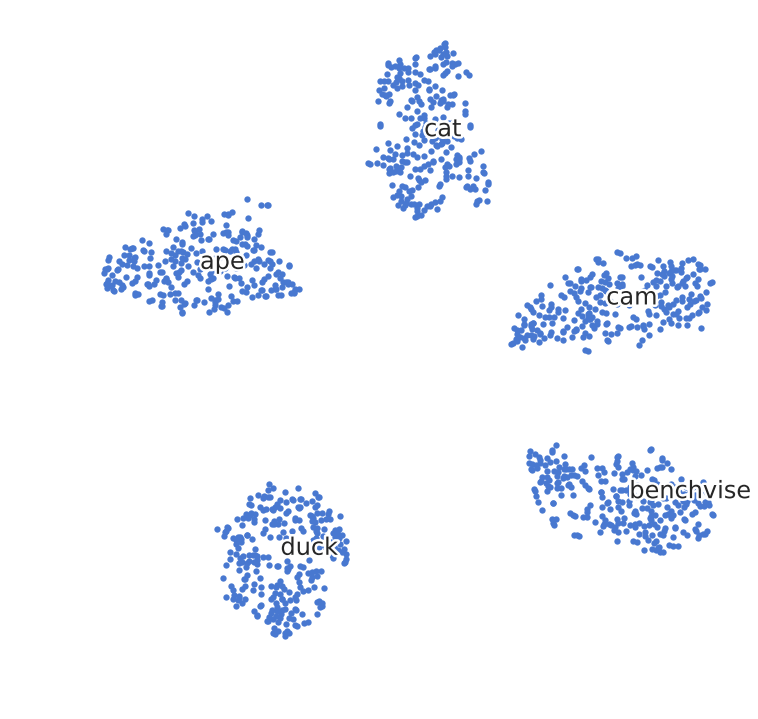

In [8]:
draw_scatter(embedding_tsne, targets)